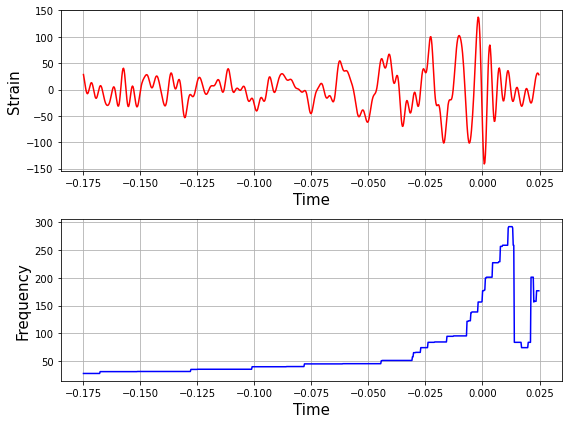

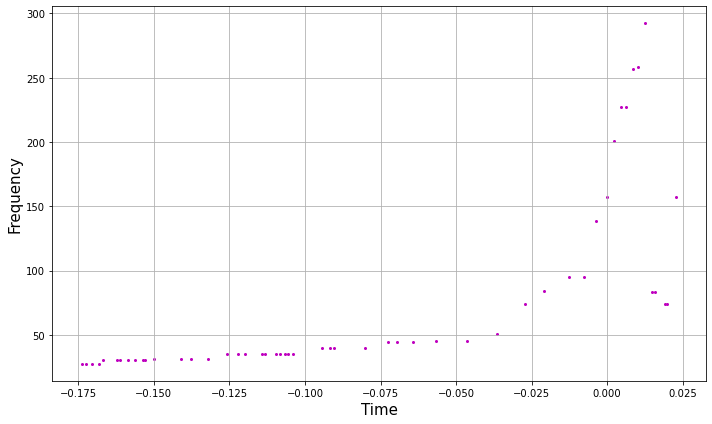

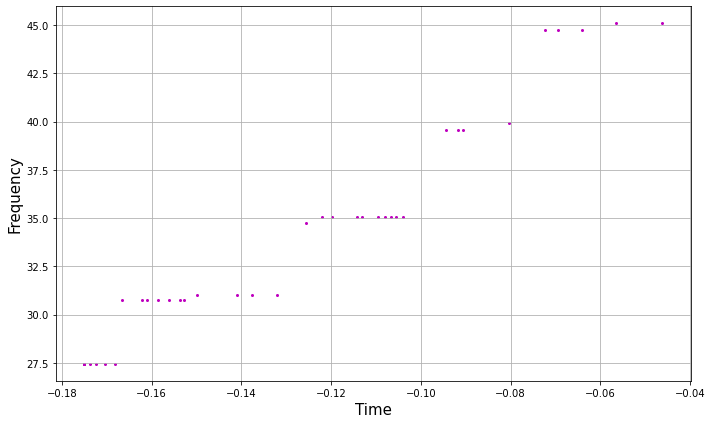

UnitConversionError: Can only apply 'subtract' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
from astropy import constants as const
from astropy import units as u

data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(time, data, 'r')
plt.grid()
plt.ylabel('Strain',size=15)
plt.xlabel('Time',size=15)
plt.subplot(2,1,2)
plt.plot(time, freq, 'b' )
plt.grid()
plt.ylabel('Frequency',size=15)
plt.xlabel('Time',size=15)
plt.tight_layout()
#plt.show()

for i in range(len(data)):
    zero_crossings = np.where(np.diff(np.sign(data)))[0] #gives index of element before zero crossing
index = zero_crossings + 1
index1 = np.zeros(len(index))
j=0
for i in range(len(index)):
    if time[index[i]] < 0 and freq[index[i]] < 50:
        index1[j] = index[i]
        j=j+1
index1 = index1.astype(int)

plt.figure(figsize=(10,6))
plt.scatter(time[index], freq[index], s=4, c='m')
plt.grid()
plt.ylabel('Frequency',size=15)
plt.xlabel('Time',size=15)
plt.tight_layout()

plt.figure(figsize=(10,6))
plt.scatter(time[index1], freq[index1], s=4, c='m')
plt.grid()
plt.ylabel('Frequency',size=15)
plt.xlabel('Time',size=15)
plt.tight_layout()
plt.show()

def f(t,m):
    tc = 0
    return ((((8*np.pi)**(8/3))*((m*const.G)**(5/3))*(-t))/(5*(const.c)**5))**(8/3)

p_opt, p_cov = cf(f, time[index1], freq[index1])
print(p_opt)

plt.scatter(time[index1], freq[index1], s=4, label='Dataset')
plt.plot(time[index1],f(time[index1],p_opt),'r',label='Best Fit')
plt.xlabel("Time", size=15)
plt.ylabel("Frequency", size=15)
plt.title('Best Fit Curve')
plt.legend()
plt.show()
